In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Summi\Downloads\archive\amazon.csv')
df.head()

amazon_title  \
0                                Tell Me your Dreams   
1       The Boy in the Striped Pyjamas (Definitions)   
2  Romancing the Balance Sheet: For Anyone Who Ow...   
3                                             Mossad   
4                                           My Story   

                   amazon_author amazon_rating amazon_reviews count  \
0              by Sidney Sheldon           4.4                160.0   
1                  by John Boyne           4.6                134.0   
2                  by Anil Lamba           4.5                156.0   
3  by Michael Bar-Zohar - Import           4.6                637.0   
4                  by Kamala Das           4.5                 42.0   

   amazon_isbn-10  amazon_price  
0      8172234902           209  
1      1862305277           350  
2      9350294311           477  
3      8184958455           340  
4      8172238975           178

In [3]:
df1=pd.read_csv(r'C:\Users\Summi\Downloads\archive\flipkart.csv')
df1.head()

flipkart_author  flipkart_isbn10                   flipkart_title  \
0       Sidney Sheldon       8172234902              TELL ME YOUR DREAMS   
1                            1862305277   The Boy in the Striped Pyjamas   
2           Anil Lamba       9350294311      ROMANCING THE BALANCE SHEET   
3    Bar-Zohar Michael       8184958455                           Mossad   
4           Kamala Das       8172238975                         MY STORY   

  flipkart_ratings count  flipkart_price flipkart_stars  
0                    902             209            4.5  
1                     83             372            4.5  
2                    352             477            4.5  
3                    560             280            4.5  
4                    322             178            4.3

In [4]:
df.count()

amazon_title            1382
amazon_author           1382
amazon_rating           1378
amazon_reviews count    1378
amazon_isbn-10          1382
amazon_price            1382
dtype: int64

In [5]:
df1.count()

flipkart_author           1382
flipkart_isbn10           1382
flipkart_title            1382
flipkart_ratings count    1382
flipkart_price            1382
flipkart_stars            1382
dtype: int64

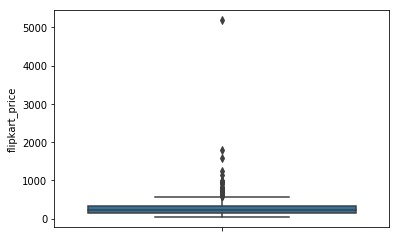

In [6]:
sns.boxplot(x=df1['flipkart_price'],orient='v') #to find out outliers we use boxplot

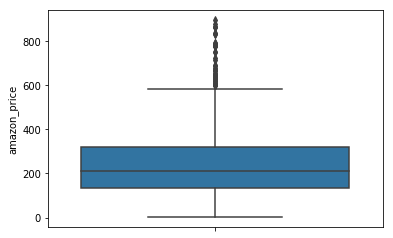

In [7]:
sns.boxplot(x=df['amazon_price'],orient='v')

In [8]:
outlier = df1[df1['flipkart_price']> 1000].index #since we found most of the outiers lie in range greater than 1000

In [9]:
df1=df1.drop(outlier)
df=df.drop(outlier)

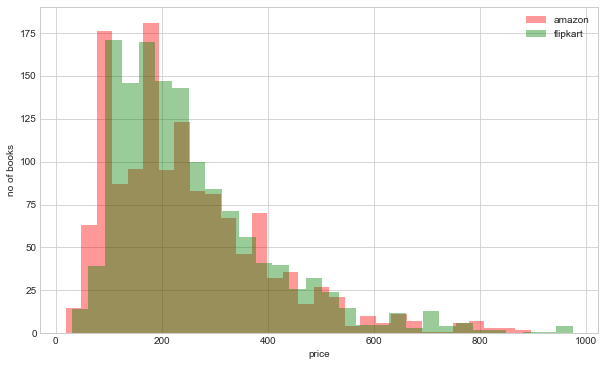

In [10]:
#comparing distribution of prices of same books on amazon and flipkart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
kwargs = dict(alpha=0.4,bins=30)#alpha parameter is used for transparency
plt.hist(df['amazon_price'], **kwargs,color='red', label='amazon')
plt.hist(df1['flipkart_price'], **kwargs,color='green', label='flipkart')
plt.xlabel("price")
plt.ylabel("no of books")
plt.legend();

In [11]:
df.drop(['amazon_reviews count','amazon_rating'],axis=1,inplace=True) #we drop unncessary columns which will not be used in our analysis

In [12]:
df1.drop(['flipkart_author','flipkart_title','flipkart_ratings count','flipkart_stars'],axis=1,inplace=True)

In [13]:
df.rename(columns={'amazon_isbn-10':'isbn'},inplace=True)
df1.rename(columns={'flipkart_isbn10':'isbn'},inplace=True)

In [14]:
df['isbn'].value_counts()
#since we can see the isbn column contain duplicates but it should be unique for each book as later we will use this to merge
#both flipkart and amazon dataframes for comparison so we need to remove duplicates

8179925919    12
8172345666    12
8173711461    10
9385152149    10
9387944891     9
1408711702     8
9386224585     7
9382618341     7
9387504921     7
8172344562     7
8192910997     7
9352641345     7
8184958455     7
9380349300     7
8129142147     6
9386850648     6
8172234902     6
9381626340     6
9312147307     6
9351772071     6
8172343116     6
8184001053     6
8186775811     6
8179922324     6
8172234988     6
9386224399     6
8192910903     6
1408855658     6
8129118920     6
8172234864     5
              ..
9312146440     1
8120340957     1
9312146998     1
9350336618     1
9350945746     1
9960899551     1
9384225762     1
8190702564     1
8183223273     1
9311126780     1
9312140329     1
1781257019     1
9351779335     1
1444776967     1
9350943182     1
8120808541     1
9386224658     1
9353024536     1
8121903645     1
8184516207     1
9353024552     1
9312146475     1
9352770102     1
8183223362     1
8190256203     1
9311124559     1
9350126672     1
8129141841    

In [15]:
df.drop_duplicates(subset='isbn',keep='first',inplace=True) 
df1.drop_duplicates(subset='isbn',keep='first',inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 1381
Data columns (total 4 columns):
amazon_title     708 non-null object
amazon_author    708 non-null object
isbn             708 non-null int64
amazon_price     708 non-null int64
dtypes: int64(2), object(2)
memory usage: 27.7+ KB


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 1381
Data columns (total 2 columns):
isbn              708 non-null int64
flipkart_price    708 non-null int64
dtypes: int64(2)
memory usage: 16.6 KB


In [18]:
df2=pd.merge(df,df1,on='isbn',how='inner') #inner is similar to inner join in sql

In [19]:
df2.head()

amazon_title  \
0                                Tell Me your Dreams   
1       The Boy in the Striped Pyjamas (Definitions)   
2  Romancing the Balance Sheet: For Anyone Who Ow...   
3                                             Mossad   
4                                           My Story   

                   amazon_author        isbn  amazon_price  flipkart_price  
0              by Sidney Sheldon  8172234902           209             209  
1                  by John Boyne  1862305277           350             372  
2                  by Anil Lamba  9350294311           477             477  
3  by Michael Bar-Zohar - Import  8184958455           340             280  
4                  by Kamala Das  8172238975           178             178

In [20]:
df2['price_diff']=df2['flipkart_price']-df2['amazon_price']

In [21]:
df2.head()

amazon_title  \
0                                Tell Me your Dreams   
1       The Boy in the Striped Pyjamas (Definitions)   
2  Romancing the Balance Sheet: For Anyone Who Ow...   
3                                             Mossad   
4                                           My Story   

                   amazon_author        isbn  amazon_price  flipkart_price  \
0              by Sidney Sheldon  8172234902           209             209   
1                  by John Boyne  1862305277           350             372   
2                  by Anil Lamba  9350294311           477             477   
3  by Michael Bar-Zohar - Import  8184958455           340             280   
4                  by Kamala Das  8172238975           178             178   

   price_diff  
0           0  
1          22  
2           0  
3         -60  
4           0

In [22]:
df2['price_diff'].describe() #as we can see 50% of the book price are same i.e has zero difference

count    708.000000
mean       4.427966
std       57.390266
min     -218.000000
25%       -9.000000
50%        0.000000
75%       24.000000
max      367.000000
Name: price_diff, dtype: float64

In [23]:
df2['price_diff_perc'] = df2['price_diff']/df2['flipkart_price']*100
df2.head()

amazon_title  \
0                                Tell Me your Dreams   
1       The Boy in the Striped Pyjamas (Definitions)   
2  Romancing the Balance Sheet: For Anyone Who Ow...   
3                                             Mossad   
4                                           My Story   

                   amazon_author        isbn  amazon_price  flipkart_price  \
0              by Sidney Sheldon  8172234902           209             209   
1                  by John Boyne  1862305277           350             372   
2                  by Anil Lamba  9350294311           477             477   
3  by Michael Bar-Zohar - Import  8184958455           340             280   
4                  by Kamala Das  8172238975           178             178   

   price_diff  price_diff_perc  
0           0         0.000000  
1          22         5.913978  
2           0         0.000000  
3         -60       -21.428571  
4           0         0.000000

In [24]:
#finding maximum and minimum prices of each book
max_price = []
min_price = []
for i,j in zip(df2['amazon_price'],df2['flipkart_price']):
    if(i>j):
        max_price.append(i)
        min_price.append(j)
    else:
        max_price.append(j)
        min_price.append(i)

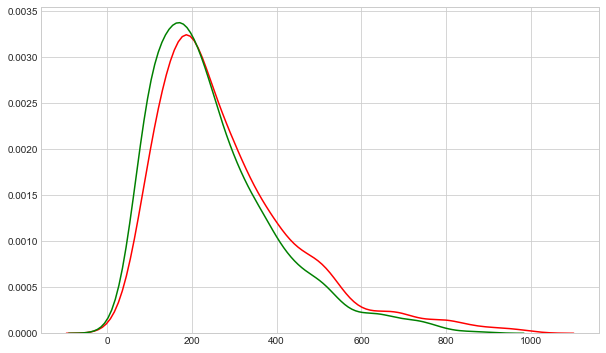

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(max_price, color='red')
sns.kdeplot(min_price, color='green')

In [26]:
print("if all books are bought from amazon then price:{}".format(df2['amazon_price'].sum()))

if all books are bought from amazon then price:187355


In [27]:
print("if all books are bought from flipkart then price:{}".format(df2['flipkart_price'].sum()))

if all books are bought from flipkart then price:190490


In [28]:
#worst case scenario:when you buy book from platform which sells it at higher price
#best case scenario:when you buy book from platform which sells it at lower price
print("Price Worst Case Scenario: {}".format(sum(max_price)))
print("Price Best Case Scenario: {}".format(sum(min_price)))

Price Worst Case Scenario: 200836
Price Best Case Scenario: 177009


In [29]:
#difference of money you can see in both scenario and how much you need to pay extra in worst case scenario
diff = sum(max_price) - sum(min_price)
print("Difference: {}".format(diff))
print("Percentage difference: {0:.2f}%".format(diff/sum(max_price)*100))

Difference: 23827
Percentage difference: 11.86%


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Price Difference (Percentage)')

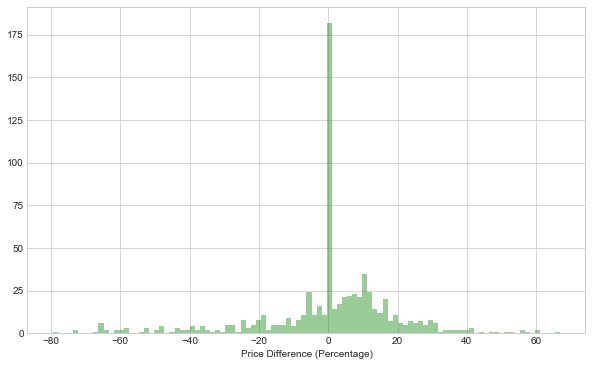

In [30]:
plt.figure(figsize=(10, 6))
sns.distplot((df2['price_diff_perc']), kde=False, color='green', bins=100)
plt.xlabel('Price Difference (Percentage)')

In [31]:
no_diff = df2[df2['price_diff'] == 0].count()[0]/df2.shape[0]
print('Percentage of books which are priced the same: {0:.2f}%'.format(no_diff*100))

print()
no_diff = df2[(abs(df2['price_diff_perc']) > 0) & (abs(df2['price_diff_perc']) < 100)].count()[0]/df2.shape[0]
print('Percentage of books with price difference: {0:.2f}%'.format(no_diff*100))

print()
no_diff = df2[df2['price_diff_perc'] < 0].count()[0]/df2.shape[0]
print('Percenatage of books with better pricing on Flipkart: {0:.2f}%'.format(no_diff*100))

print()
no_diff = df2[df2['price_diff_perc'] > 0].count()[0]/df2.shape[0]
print('Percenatage of books with better pricing on Amazon: {0:.2f}%'.format(no_diff*100))

Percentage of books which are priced the same: 25.14%

Percentage of books with price difference: 74.86%

Percenatage of books with better pricing on Flipkart: 29.80%

Percenatage of books with better pricing on Amazon: 45.06%


In [32]:
#How much would you overpay if you choose any one of the site, compared to our best price?(best price =min price available for each book on either platform)

print("Only Flipkart: {0:.2f}%".format((100*(df2['flipkart_price'].sum() - sum(min_price))/sum(min_price))))
print()
print("Only Amazon: {0:.2f}%".format((100*(df2['amazon_price'].sum() - sum(min_price))/sum(min_price))))

Only Flipkart: 7.62%

Only Amazon: 5.84%
